## Exploration of the characters' features :

* This notebook is mainly a exploration of the nationalities and ethnicities but also going deeper into the gender of movies characters and its relationship with movies genres for instance

In [1]:
import networkx as nx
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.express as px

## Load preprocessed data

In [2]:
df_movies = pd.read_pickle('../data/generated/preprocessed/movies.pkl')
df_movies

,wiki_id,fb_id,movie_name,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year,principal_genre,fb_movie_id,tomato_score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,/m/03vyhn,22.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery,Biographical film,Drama,Crime Drama",2000,Mystery,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction,Drama",1988,Crime Fiction,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller,Erotic thriller,Psychological thriller",1987,Thriller,/m/0285_cd,50.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983,Drama,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Drama,2011,Drama,NaN,NaN
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,"Ireland,United Kingdom","Biographical film,Drama,Documentary",2011,Biographical film,/m/0g4pl34,93.0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,"Satire,Comedy",1972,Satire,NaN,NaN
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,Japan,"Science Fiction,Japanese Movies,Adventure,Anim...",1992,Science Fiction,NaN,NaN


In [3]:
df_characters = pd.read_pickle('../data/generated/preprocessed/characters.pkl')
df_characters


,wiki_id,fb_movie_id,release,character_name,actor_age,fb_char_id,fb_actor_id,actor_name,actor_birth,ethnicity,actor_height,actor_gender,actor_nationality
0,975900,/m/03vyhn,2001-08-24,Akooshay,42.0,/m/0bgchxw,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
1,24767455,/m/0809s7n,2009-10-16,Captain Diaz,51.0,/m/08d9z0b,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
2,5337169,/m/0dg7mt,2001,NaN,42.0,/m/04htxdc,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
3,1330220,/m/04t8wq,1990-06-22,NaN,31.0,/m/0cg7kl2,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
4,14686017,/m/03gt21w,1990-01-12,NaN,31.0,/m/09j0r8t,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Additional Voices,38.0,/m/0kr405f,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN
450665,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,38.0,/m/0kr407w,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN
450666,913762,/m/03pcrp,1992-05-21,Silvie Gena,34.0,/m/0kr40b9,/m/0gn4nd,Susan Byrkett,1958,NaN,NaN,F,NaN
450667,913762,/m/03pcrp,1992-05-21,Exegran,NaN,/m/0kr407c,/m/0kr407h,Hal Cleaveland,NaN,NaN,NaN,M,NaN


In [4]:
# Create a merge table (on the movie_id) between characters and movies 
merge_table = pd.merge(df_characters, df_movies, on=["wiki_id"])

## Analysis of the number of rate between local actors and foreign actors in movies

In [5]:
#create a new column in character table which indicates if the actor who is playing the role is a local actor or not
df_characters['local_actor']= merge_table.apply(lambda x: x.movie_countries.find(str(x.actor_nationality)), axis=1).apply(lambda x: False if x < 0 else True)
df_characters[df_characters.actor_nationality.isnull() == False]

#create a new column in characters table where we compute the rate of local actor in the movie where the character appears
groupby =df_characters.groupby('wiki_id')['local_actor'].agg(['mean'])
df_characters['local_rate']= df_characters['wiki_id'].apply(lambda x: groupby.loc[x]['mean'])
df_characters


,wiki_id,fb_movie_id,release,character_name,actor_age,fb_char_id,fb_actor_id,actor_name,actor_birth,ethnicity,actor_height,actor_gender,actor_nationality,local_actor,local_rate
0,975900,/m/03vyhn,2001-08-24,Akooshay,42.0,/m/0bgchxw,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,True,0.705882
1,24767455,/m/0809s7n,2009-10-16,Captain Diaz,51.0,/m/08d9z0b,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,False,0.571429
2,5337169,/m/0dg7mt,2001,NaN,42.0,/m/04htxdc,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,True,0.750000
3,1330220,/m/04t8wq,1990-06-22,NaN,31.0,/m/0cg7kl2,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,False,0.521739
4,14686017,/m/03gt21w,1990-01-12,NaN,31.0,/m/09j0r8t,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,True,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Additional Voices,38.0,/m/0kr405f,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN,False,0.466667
450665,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,38.0,/m/0kr407w,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN,False,0.466667
450666,913762,/m/03pcrp,1992-05-21,Silvie Gena,34.0,/m/0kr40b9,/m/0gn4nd,Susan Byrkett,1958,NaN,NaN,F,NaN,False,0.466667
450667,913762,/m/03pcrp,1992-05-21,Exegran,NaN,/m/0kr407c,/m/0kr407h,Hal Cleaveland,NaN,NaN,NaN,M,NaN,False,0.466667


In [6]:
#we drop the duplicates of wiki_id to keep only 1 example of the movie.
#we don't care about the characters because we only keep the wiki_id, the movie_release_year and the local_rate.
rate_table = pd.merge(df_movies[['wiki_id','movie_release_year']], df_characters[['wiki_id','local_rate']].drop_duplicates(subset=['wiki_id']) , on='wiki_id')


In [7]:
#compute the average rate of the local rate and its standard deviation with respect to the movie year of release
stats_by_year = rate_table.groupby(rate_table['movie_release_year']).apply(lambda x: pd.Series({
        'average_local_rate': x['local_rate'].mean(),
        'std_dev_local_rate': x['local_rate'].std()
    }))
stats_by_year = stats_by_year[stats_by_year.std_dev_local_rate.isnull() == False]
stats_by_year

,average_local_rate,std_dev_local_rate
movie_release_year,,
1894,0.750000,0.500000
1896,0.466667,0.505525
1897,0.250000,0.353553
1898,0.333333,0.577350
1899,0.476190,0.501698
...,...,...
2011,0.595575,0.271193
2012,0.615864,0.283915
2013,0.654412,0.252379


Text(0, 0.5, 'Local Actor Rate')

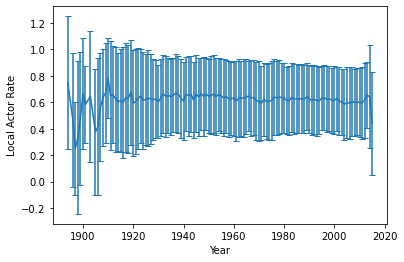

In [8]:
#we plot the plot with error bar according to the standard deviation (the goal is to hypothetically observe a trend)
plt.errorbar(stats_by_year.index, stats_by_year.average_local_rate,
             yerr = stats_by_year.std_dev_local_rate,
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Local Actor Rate')

Text(0, 0.5, 'Local Actor Rate')

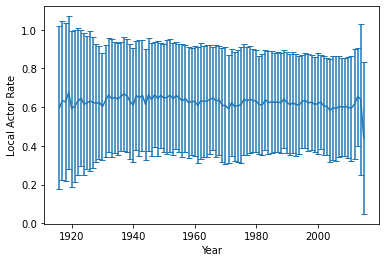

In [9]:
#for the years before 1915, the graph isn't very representive due to lack of data at this period, that why we decided to drop them
stats_by_year = stats_by_year[stats_by_year.index > 1915]
plt.errorbar(stats_by_year.index, stats_by_year.average_local_rate,
             yerr = stats_by_year.std_dev_local_rate,
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Local Actor Rate')

Text(0, 0.5, 'Local Actor Rate')

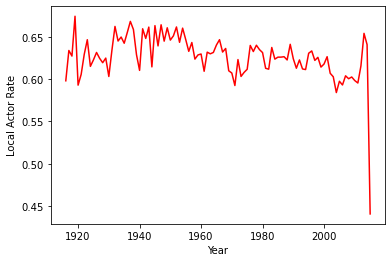

In [10]:
#same plot but without error bars
plt.plot(stats_by_year.average_local_rate, color = 'red')

plt.xlabel('Year')
plt.ylabel('Local Actor Rate')

>We don't observe any tendency which can be immediately interpretable. Some small periods admit little increases and decreases but not large changes since almost one century.

## Now we used to focus on the ethnicity and the link we can made with this subset

In [11]:
#take the characters where the ethnicity is indicated and 
research_ethnicity= df_characters.dropna(subset='ethnicity')
print('number of ethnicity in total =', len(research_ethnicity))
top_ethnicity= research_ethnicity.groupby(research_ethnicity['ethnicity']).apply(lambda x: pd.Series({
        'number': len(x)
        })).sort_values('number', ascending=False).head(15)
top_ethnicity = top_ethnicity.sort_values('number', ascending=True)

number of ethnicity in total = 48652


In [12]:
#create table with the most present ethnicities
top_ethnicity

,number
ethnicity,
Marathi people,850
Bengali people,868
Swedes,905
German Americans,949
Swedish Americans,977
Scottish people,1028
Malayali,1146
Punjabis,1155
Tamil,1215


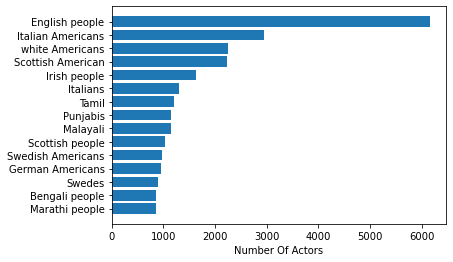

In [13]:
#create a bar plot to visualize the most present ethnicities

y_pos = np.arange(len(top_ethnicity.index))
plt.barh(y_pos, top_ethnicity.number)
plt.yticks(y_pos, top_ethnicity.index)
plt.xlabel('Number Of Actors')
plt.show()

## Visualize the influence of actor gender according to the movie genres

In [14]:
#What are the movie genres where the most actors play into.
top_genres= str(merge_table.groupby(merge_table['principal_genre']).apply(lambda x: pd.Series({
        'average': len(x)
        })).sort_values('average', ascending=False).head(10).index)
top_genres

"Index(['Thriller', 'Drama', 'Crime Fiction', 'Romantic comedy', 'Romance Film',\n       'Short Film', 'Comedy', 'Action/Adventure', 'Science Fiction',\n       'Romantic drama'],\n      dtype='object', name='principal_genre')"

In [15]:
#remove ' ' genre which needs to be consider as a NaN value. And we drop the NaN just after that.
merge_table['principal_genre'].replace('', np.nan, inplace=True)
merge_info = merge_table.dropna(subset='principal_genre')

In [16]:
#only keep movies from movie genres where the most actors play into (top genres)
table_wrt_top_genres = merge_info[merge_info.apply(lambda x: top_genres.find(str(x.principal_genre)), axis=1).apply(lambda x: False if x < 0 else True)]
#remove 'Action' genre because it was kept despite it is not a top genre, due to 'Action/Adventure' genre.
table_wrt_top_genres= table_wrt_top_genres[table_wrt_top_genres.apply(lambda x: False if x.principal_genre == 'Action' else True, axis=1)]
table_wrt_top_genres

,wiki_id,fb_movie_id_x,release,character_name,actor_age,fb_char_id,fb_actor_id,actor_name,actor_birth,ethnicity,...,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year,principal_genre,fb_movie_id_y,tomato_score
0,975900,/m/03vyhn,2001-08-24,Akooshay,42.0,/m/0bgchxw,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,...,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,/m/03vyhn,22.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,27.0,/m/0jys3m,/m/0346l4,Natasha Henstridge,1974-08-15,NaN,...,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,/m/03vyhn,22.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,32.0,/m/0jys3g,/m/01vw26l,Ice Cube,1969-06-15,NaN,...,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,/m/03vyhn,22.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,33.0,/m/02vchl6,/m/034hyc,Jason Statham,1967-09-12,NaN,...,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,/m/03vyhn,22.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,23.0,/m/02vbb3r,/m/01y9xg,Clea DuVall,1977-09-25,NaN,...,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,/m/03vyhn,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450659,26701995,/m/0bmd77z,1977-10-13,NaN,NaN,/m/0gbr2nh,/m/0gbr2nl,Xiying Wen,NaN,NaN,...,1977-10-13,NaN,110.0,Standard Mandarin,China,"Drama,Chinese Movies",1977,Drama,NaN,NaN
450660,26701995,/m/0bmd77z,1977-10-13,NaN,NaN,/m/0gbr2nv,/m/0gbr2ny,Zhenqing Guo,NaN,NaN,...,1977-10-13,NaN,110.0,Standard Mandarin,China,"Drama,Chinese Movies",1977,Drama,NaN,NaN
450661,26701995,/m/0bmd77z,1977-10-13,NaN,NaN,/m/0gbr2p5,/m/0gbr2p8,Suya Wang,NaN,NaN,...,1977-10-13,NaN,110.0,Standard Mandarin,China,"Drama,Chinese Movies",1977,Drama,NaN,NaN
450662,26701995,/m/0bmd77z,1977-10-13,NaN,NaN,/m/0gbr2pj,/m/0gbr2pm,Zheng Zhang,NaN,NaN,...,1977-10-13,NaN,110.0,Standard Mandarin,China,"Drama,Chinese Movies",1977,Drama,NaN,NaN


In [17]:
#compute table with the number women and men actors in the top genres movies.
table_gender_comparison= table_wrt_top_genres.groupby(table_wrt_top_genres['principal_genre']).apply(lambda x: pd.Series({
        'number_of_actors': len(x[x['actor_gender'] == 'F'])
        })).sort_values('number_of_actors', ascending=False).head(10)
table_gender_comparison = pd.concat([table_gender_comparison, (table_wrt_top_genres.groupby(table_wrt_top_genres['principal_genre']).apply(lambda x: pd.Series({
        'number_of_actors': len(x[x['actor_gender'] == 'M'])
        }))).sort_values('number_of_actors', ascending=False).head(10)])

liste = []
for i in range(20):
        liste.append( 'F' if i < 10 else 'M')
table_gender_comparison['sex']= liste
table_gender_comparison

,number_of_actors,sex
principal_genre,,
Drama,18886,F
Thriller,17603,F
Romantic comedy,9329,F
Crime Fiction,9320,F
Romance Film,6269,F
Comedy,4313,F
Short Film,3937,F
Romantic drama,3743,F
Science Fiction,2761,F


In [18]:
#plot this table through interactive way to compare women and men actors into movies with respect to the specific genre.
fig = px.bar(table_gender_comparison, x="sex", y="number_of_actors", color="sex",
   animation_frame=table_gender_comparison.index, animation_group="sex", 
   range_y=[0,20000])
fig.update_layout(
    height=600,
    width= 830,
    title_text='Difference between men and women according to the top10 genre (w.r.t. actors numbers)'
)
fig.show()

> We can observe that every genre from the top 10 lead to larger number of actor compared to actress. This difference is more or less depending on the genre. Even though we can't have direct conclusion, the tendency is to have more men that women in movies (be careful about the original data that can just mention more actor than actress i.e. unbalanced dataset).

In [19]:
#compute table of top 10 genre where women actress have a role
top_genre_women= merge_info.groupby(merge_info['principal_genre']).apply(lambda x: pd.Series({
        'number_of_actors': len(x[x['actor_gender'] == 'F'])
        })).sort_values('number_of_actors', ascending=False).head(10)
top_genre_women

,number_of_actors
principal_genre,
Drama,18886
Thriller,17603
Romantic comedy,9329
Crime Fiction,9320
Romance Film,6269
Comedy,4313
Short Film,3937
Romantic drama,3743
Musical,3558


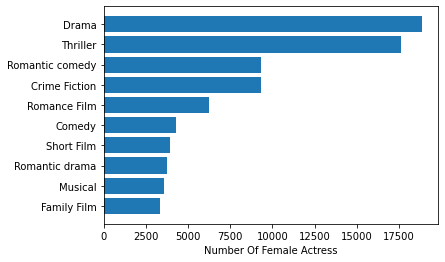

In [20]:
#bar plot the last table
top_genre_women= top_genre_women.sort_values('number_of_actors', ascending=True)
y_pos = np.arange(len(top_genre_women.index))

plt.barh(y_pos, top_genre_women.number_of_actors)
 
plt.yticks(y_pos, top_genre_women.index)

plt.xlabel('Number Of Female Actress')
 
plt.show()

In [21]:
#do the same for the men actors
top_genre_men= merge_info.groupby(merge_info['principal_genre']).apply(lambda x: pd.Series({
        'number_of_actors': len(x[x['actor_gender'] == 'M'])
        })).sort_values('number_of_actors', ascending=False).head(10)
top_genre_men

,number_of_actors
principal_genre,
Thriller,38517
Drama,31804
Crime Fiction,23500
Romantic comedy,12999
Short Film,10375
Romance Film,9762
Action/Adventure,9760
Comedy,8627
Science Fiction,6895


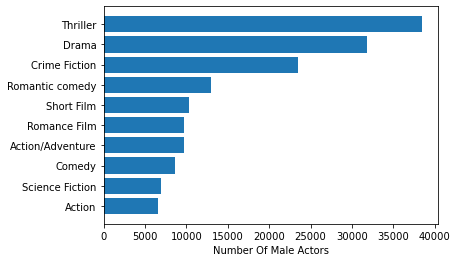

In [22]:
#bar plot the last table
top_genre_men= top_genre_men.sort_values('number_of_actors', ascending=True)
y_pos = np.arange(len(top_genre_men.index))

plt.barh(y_pos, top_genre_men.number_of_actors)
 
plt.yticks(y_pos, top_genre_men.index)

plt.xlabel('Number Of Male Actors')
 
plt.show()

> The two last plots highlight that the top 10 genre where both actress and actor play a role into are almost the same, with just little changes. 'Action'/'Action/Adventure' and 'Science Fiction' top 10 men genres are replaced by 'Musical'/'Romantic Drama' and 'Family' genres for women.